![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [46]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Begin coding here ...
# Use as many cells as you like

Practice your skills in importing and cleaning data and data manipulation and report insights to a real estate start-up

In [47]:
# importing csv file of data/airbnb_price.csv
# Import necessary packages
import pandas as pd
import numpy as np
airbnb_price = pd.read_csv("data/airbnb_price.csv")
airbnb_price

listing_id        price                 nbhood_full
0            2595  225 dollars          Manhattan, Midtown
1            3831   89 dollars      Brooklyn, Clinton Hill
2            5099  200 dollars      Manhattan, Murray Hill
3            5178   79 dollars   Manhattan, Hell's Kitchen
4            5238  150 dollars        Manhattan, Chinatown
...           ...          ...                         ...
25204    36425863  129 dollars  Manhattan, Upper East Side
25205    36427429   45 dollars            Queens, Flushing
25206    36438336  235 dollars  Staten Island, Great Kills
25207    36442252  100 dollars           Bronx, Mott Haven
25208    36455809   30 dollars          Brooklyn, Bushwick

[25209 rows x 3 columns]

In [48]:
# importing tsv file of data/airbnb_last_review.csv
# Import necessary packages
import pandas as pd
import numpy as np
airbnb_last_review = pd.read_csv("data/airbnb_last_review.tsv", sep='\t')
airbnb_last_review

listing_id    host_name   last_review
0            2595     Jennifer   May 21 2019
1            3831  LisaRoxanne  July 05 2019
2            5099        Chris  June 22 2019
3            5178     Shunichi  June 24 2019
4            5238          Ben  June 09 2019
...           ...          ...           ...
25204    36425863        Rusaa  July 07 2019
25205    36427429         H Ai  July 07 2019
25206    36438336          Ben  July 07 2019
25207    36442252       Blaine  July 07 2019
25208    36455809    Christine  July 08 2019

[25209 rows x 3 columns]

In [49]:
# importing tsv file of data/airbnb_room_type.csv
# Import necessary packages
import pandas as pd
import numpy as np
airbnb_room_type = pd.read_excel("data/airbnb_room_type.xlsx")
airbnb_room_type.size

75627

In [50]:
#merging the three dataset together
import pandas as pd
data = pd.merge(airbnb_room_type, airbnb_price, on="listing_id", how="left")
data = pd.merge(data, airbnb_last_review, on="listing_id", how="left")
data.shape

(25209, 7)

In [51]:
# Drop rows where 'description' or 'host_name' are null
data_cleaned = data.dropna(subset=['description', 'host_name'])

# Validate that there are no null values in 'description' and 'host_name'
data_cleaned.isnull().sum()
data = data_cleaned
data.head(10)

listing_id  ...   last_review
0        2595  ...   May 21 2019
1        3831  ...  July 05 2019
2        5099  ...  June 22 2019
3        5178  ...  June 24 2019
4        5238  ...  June 09 2019
5        5295  ...  June 22 2019
6        5441  ...  June 23 2019
7        5803  ...  June 24 2019
8        6021  ...  July 05 2019
9        6848  ...  June 29 2019

[10 rows x 7 columns]

In [52]:
# Standardize the 'room_type' column to proper case
data['room_type'] = data['room_type'].str.title()

# Verify the changes
data.room_type.unique()

array(['Entire Home/Apt', 'Private Room', 'Shared Room'], dtype=object)

In [53]:
# validating the price column
data['price'] = data['price'].replace('dollars', '', regex=True).astype(float)
data['price'] = data['price'].replace('[\.,]', '', regex=True).astype(float)

# Validate the changes
data.price.count()

25191

In [54]:
# Change the datatype of 'last_review' column to datetime
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# Validate the changes
data.last_review.head()

0   2019-05-21
1   2019-07-05
2   2019-06-22
3   2019-06-24
4   2019-06-09
Name: last_review, dtype: datetime64[ns]

In [55]:
# Ensure that the split operation results in exactly two columns
data[['City', 'Neighborhood']] = data['nbhood_full'].str.split(', ', n=1, expand=True)

data.head()

listing_id  ...    Neighborhood
0        2595  ...         Midtown
1        3831  ...    Clinton Hill
2        5099  ...     Murray Hill
3        5178  ...  Hell's Kitchen
4        5238  ...       Chinatown

[5 rows x 9 columns]

# DESCRIPTIVE STATISTIVE

In [56]:
# Summary statistics for price
price_stats = data['price'].describe()
print(price_stats)

count    25191.000000
mean       141.816998
std        147.389669
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


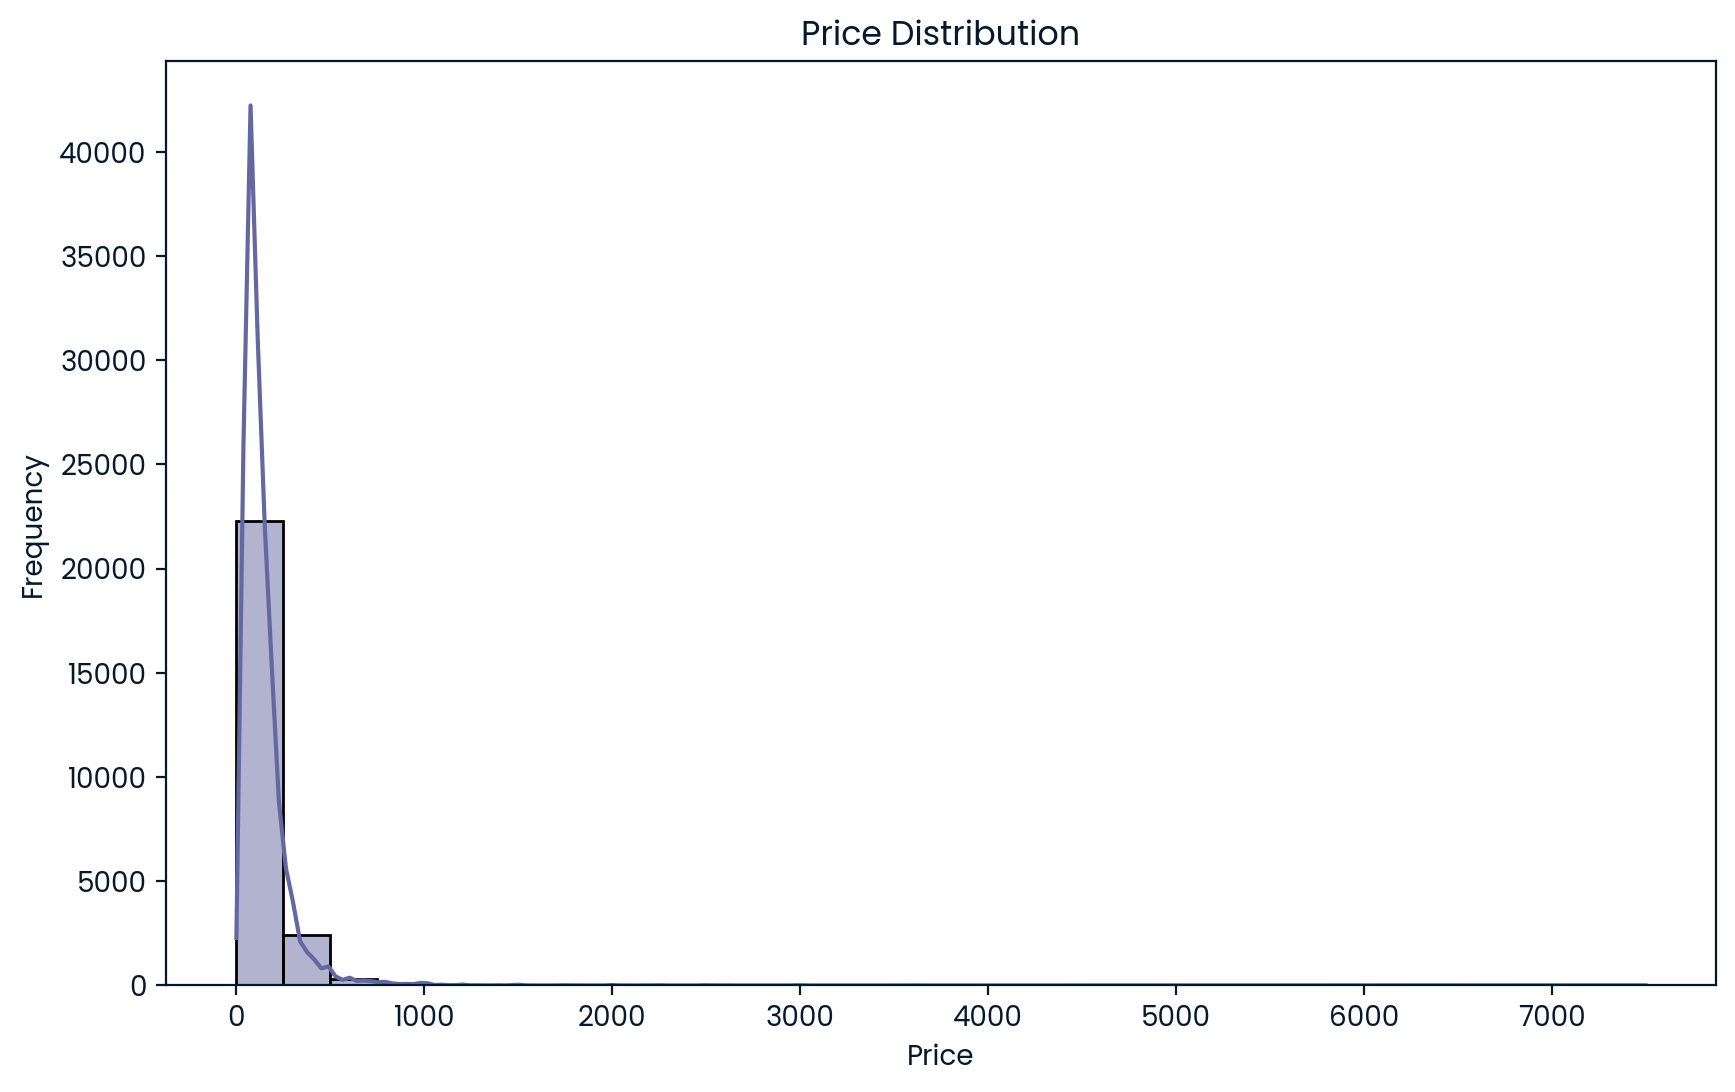

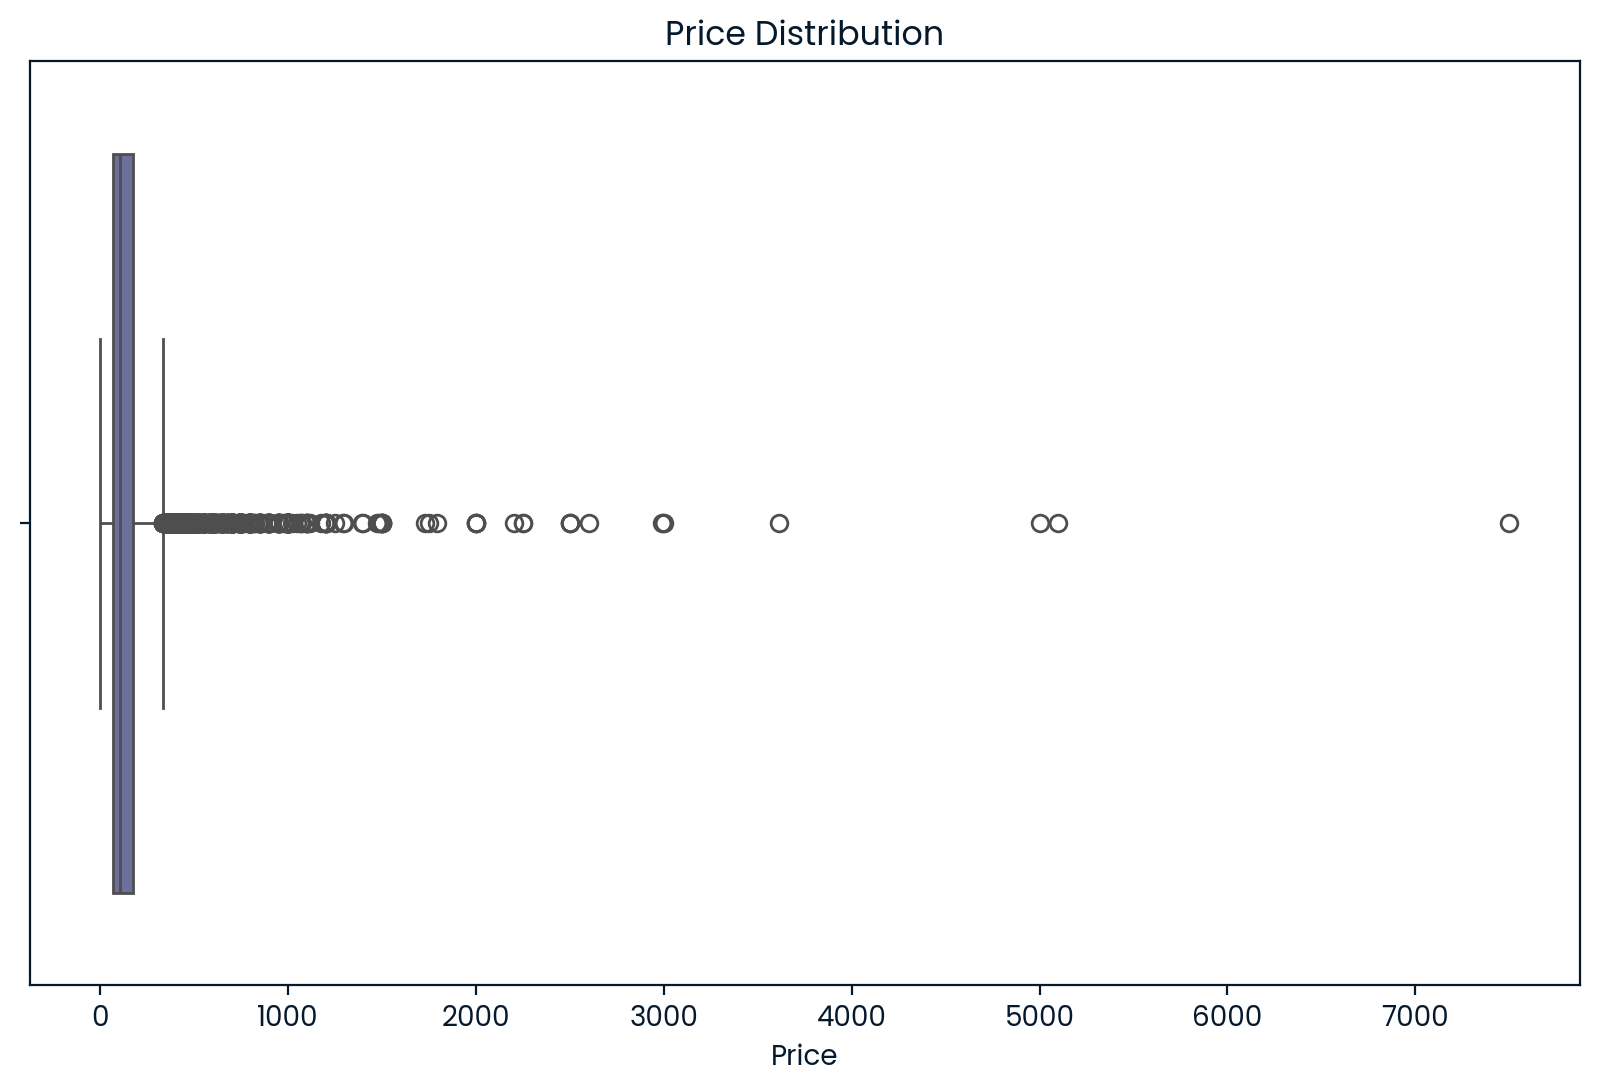

In [57]:
# price description

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

In [58]:
neighborhood_stats = data.groupby('nbhood_full')['price'].describe()
print(neighborhood_stats)


                              count        mean  ...     75%    max
nbhood_full                                      ...               
Bronx, Allerton                30.0   98.933333  ...  136.25  450.0
Bronx, Baychester               5.0   78.600000  ...   95.00  101.0
Bronx, Belmont                 16.0   91.875000  ...  100.00  299.0
Bronx, Bronxdale               10.0   53.600000  ...   59.25   79.0
Bronx, Castle Hill              2.0   74.000000  ...   80.00   86.0
...                             ...         ...  ...     ...    ...
Staten Island, Todt Hill        3.0   82.333333  ...   98.50  135.0
Staten Island, Tompkinsville   33.0   78.848485  ...   99.00  245.0
Staten Island, Tottenville      5.0  160.800000  ...  275.00  299.0
Staten Island, West Brighton   14.0   67.142857  ...   78.75  125.0
Staten Island, Willowbrook      1.0  249.000000  ...  249.00  249.0

[217 rows x 8 columns]


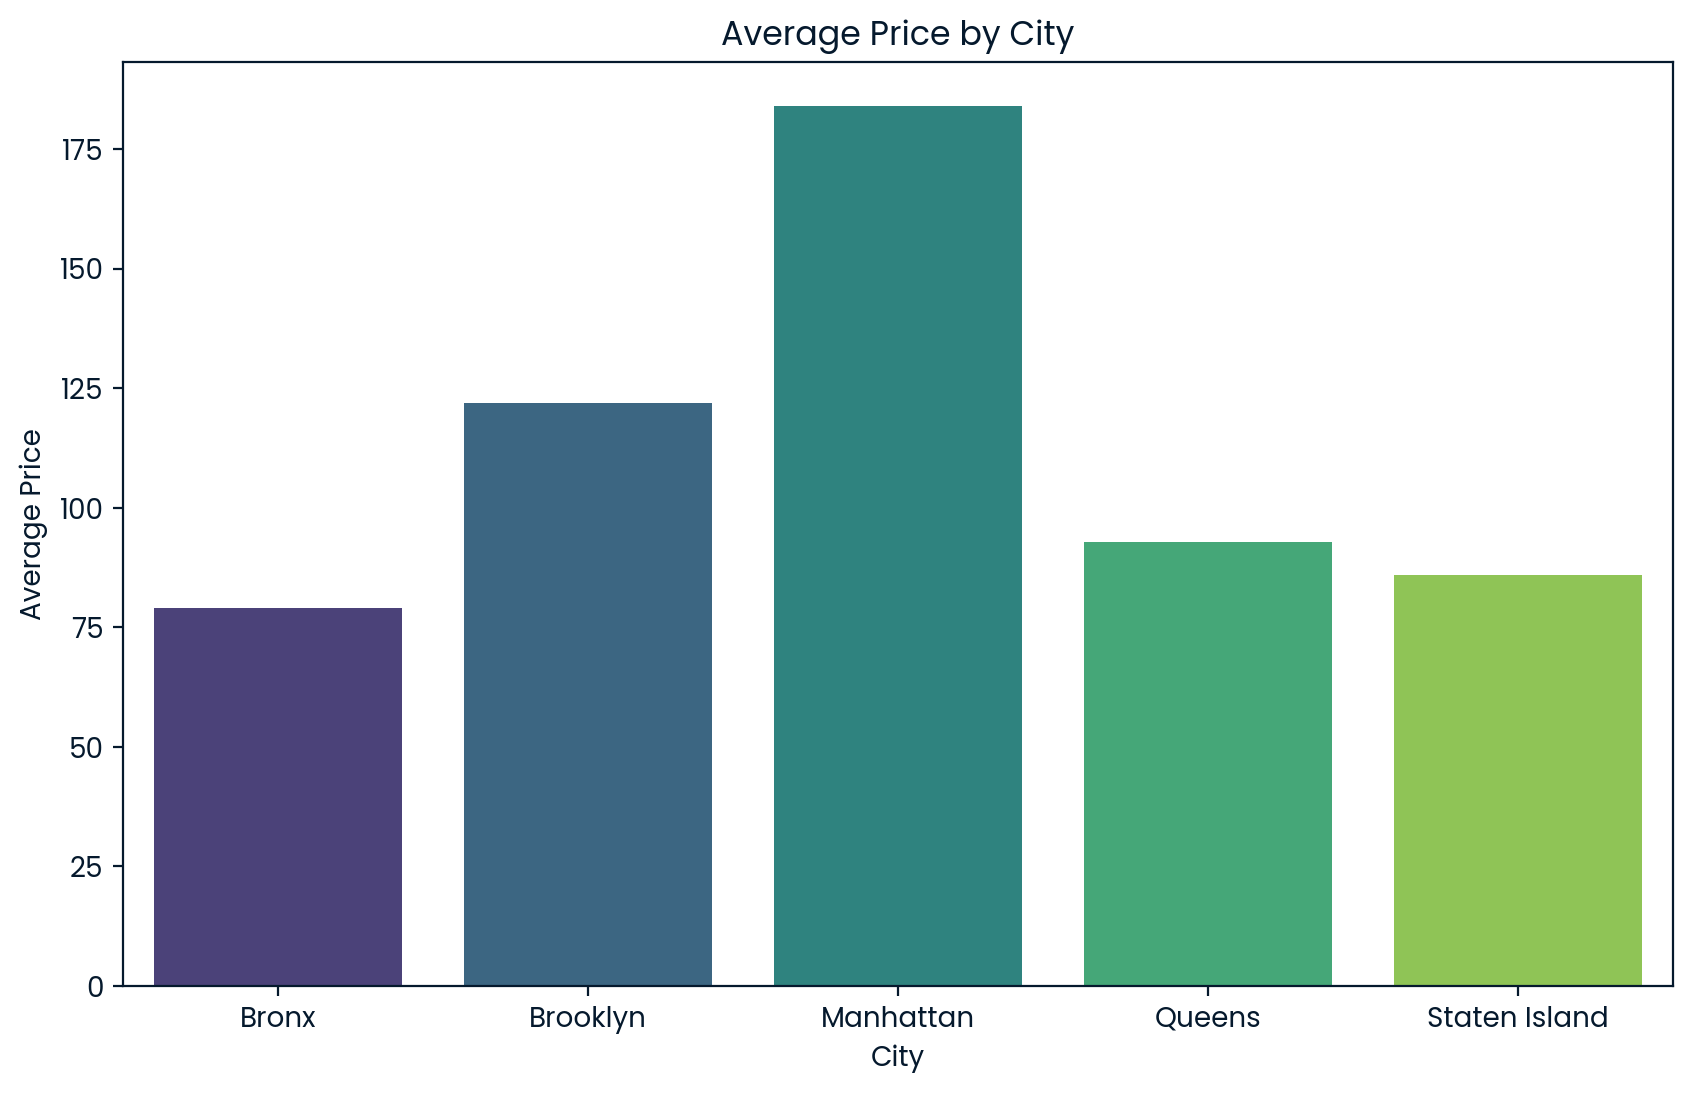

In [65]:
# Price Comparison by City with colored bars
city_avg_price = data.groupby('City')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='City', y='price', data=city_avg_price, palette='viridis')
barplot.set_title('Average Price by City')
barplot.set_xlabel('City')
barplot.set_ylabel('Average Price')
plt.show()

In [60]:
# Top and Botton neighboorhood
top_neighborhoods = neighborhood_stats.sort_values(by='mean', ascending=False).head(10)
bottom_neighborhoods = neighborhood_stats.sort_values(by='mean', ascending=True).head(10)
print("Top Neighborhoods by Average Price:")
print(top_neighborhoods)
print("\nBottom Neighborhoods by Average Price:")
print(bottom_neighborhoods)


Top Neighborhoods by Average Price:
                              count        mean  ...      75%     max
nbhood_full                                      ...                 
Brooklyn, Sea Gate              2.0  805.000000  ...  1145.00  1485.0
Manhattan, Tribeca             61.0  396.704918  ...   450.00  2000.0
Manhattan, Flatiron District   36.0  342.055556  ...   452.25  1500.0
Manhattan, NoHo                41.0  335.024390  ...   400.00  1795.0
Manhattan, SoHo               191.0  299.162304  ...   350.00  3000.0
Queens, Neponsit                3.0  274.666667  ...   312.00   350.0
Manhattan, Midtown            608.0  272.213816  ...   307.00  5100.0
Manhattan, West Village       358.0  258.762570  ...   275.00  1500.0
Staten Island, Willowbrook      1.0  249.000000  ...   249.00   249.0
Manhattan, Murray Hill        188.0  240.367021  ...   262.25  1177.0

[10 rows x 8 columns]

Bottom Neighborhoods by Average Price:
                               count   mean        std  ...  

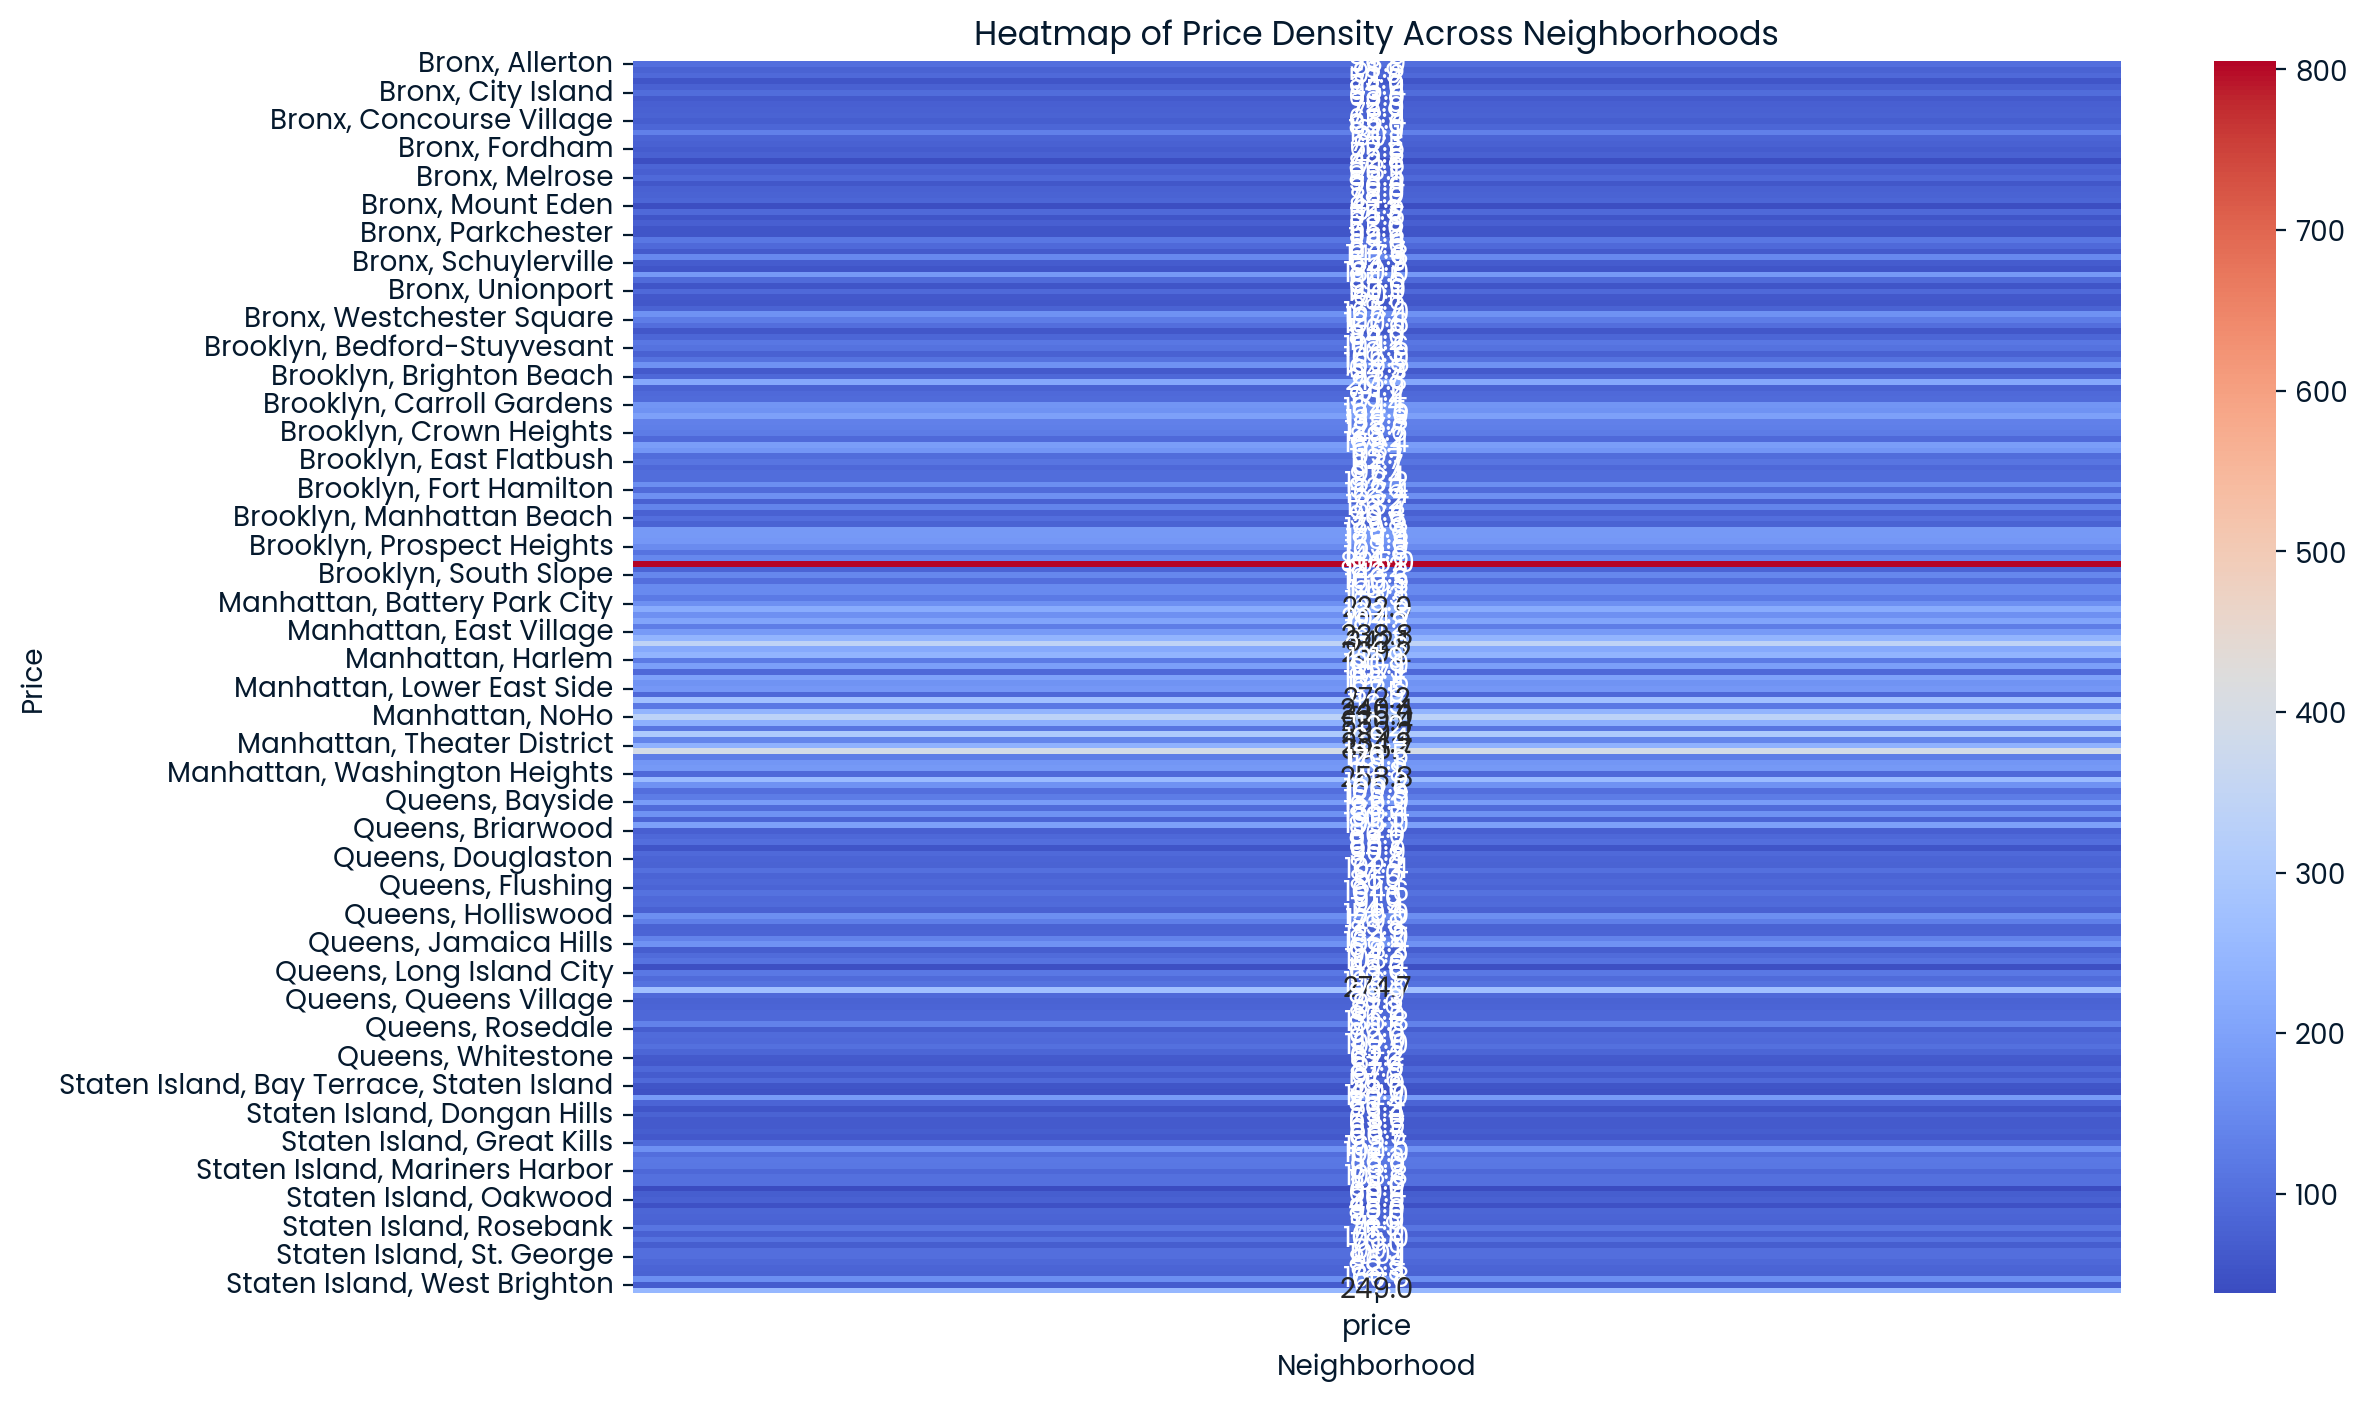

In [61]:
# Price Density Across Neighborhoods
plt.figure(figsize=(12, 8))
neighborhood_pivot = data.pivot_table(index='nbhood_full', values='price', aggfunc='mean')
sns.heatmap(neighborhood_pivot, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Heatmap of Price Density Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()


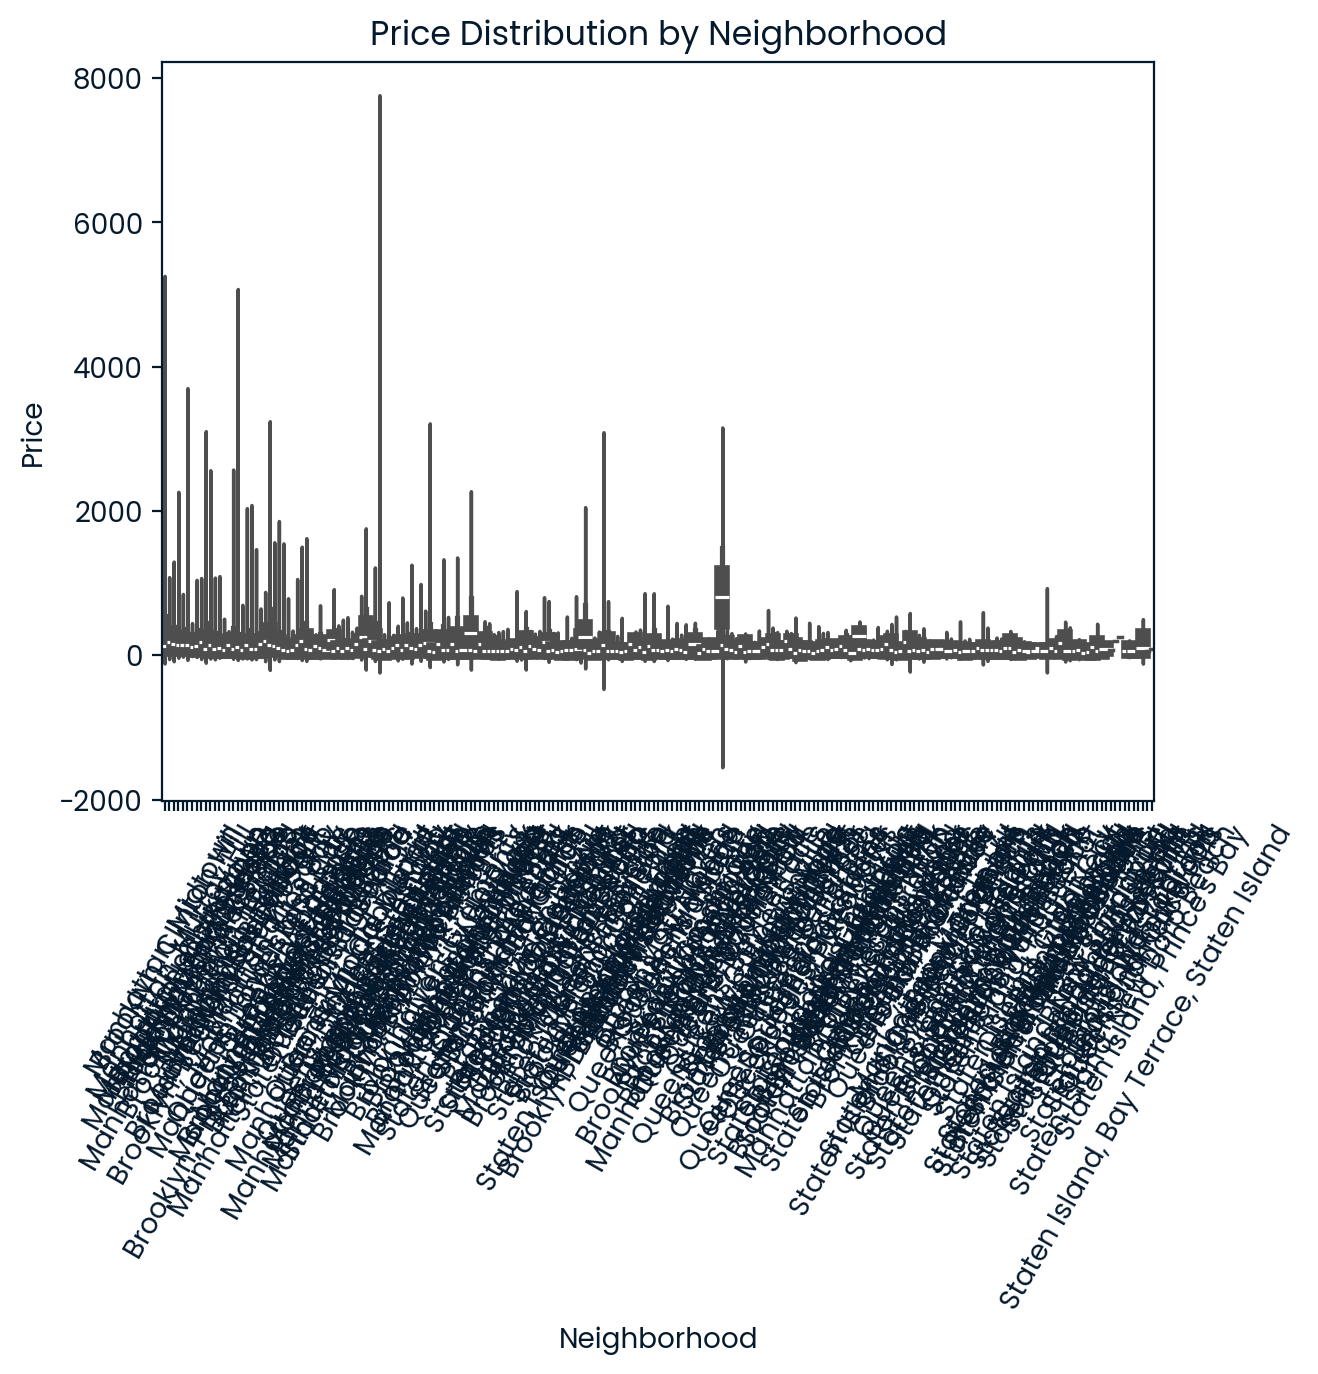

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
sns.violinplot(x='nbhood_full', y='price', data=data)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=60)
plt.show()



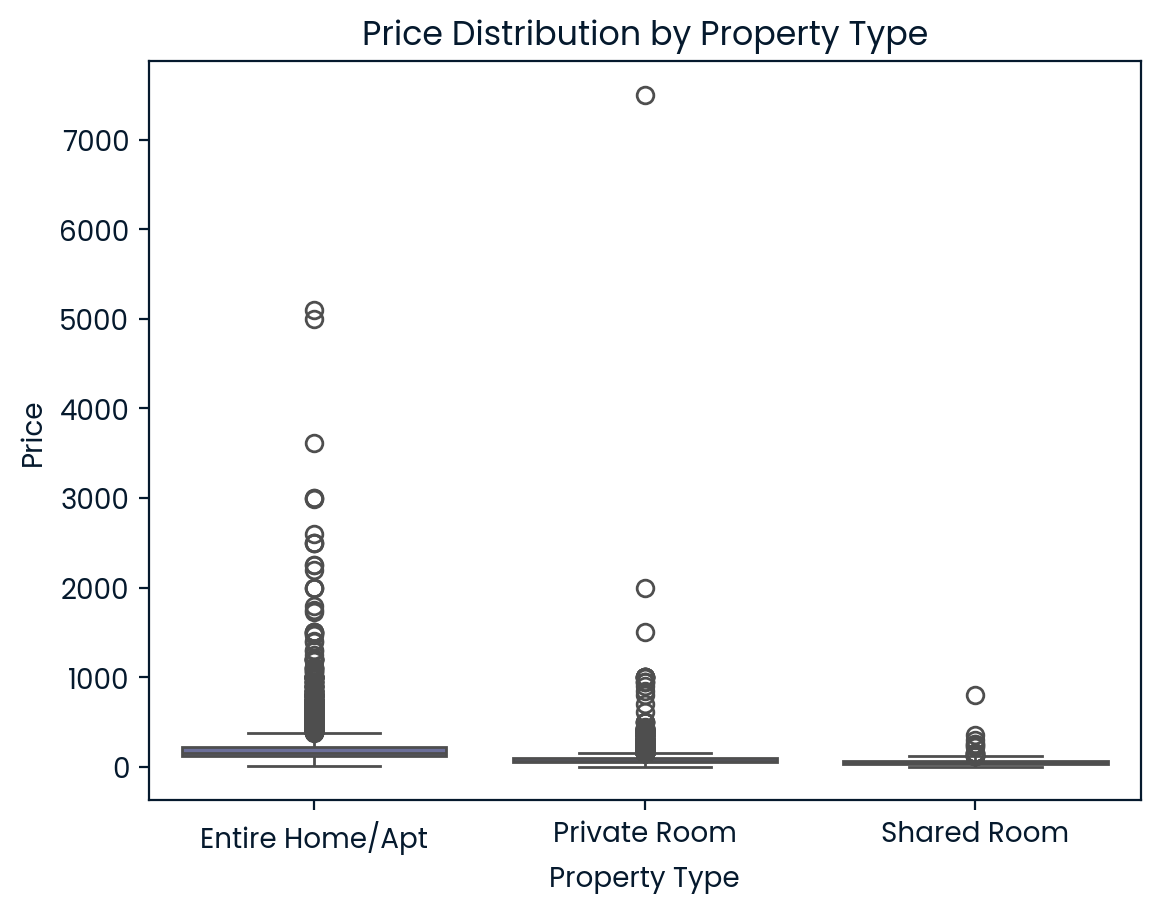

In [63]:
import seaborn as sns
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()


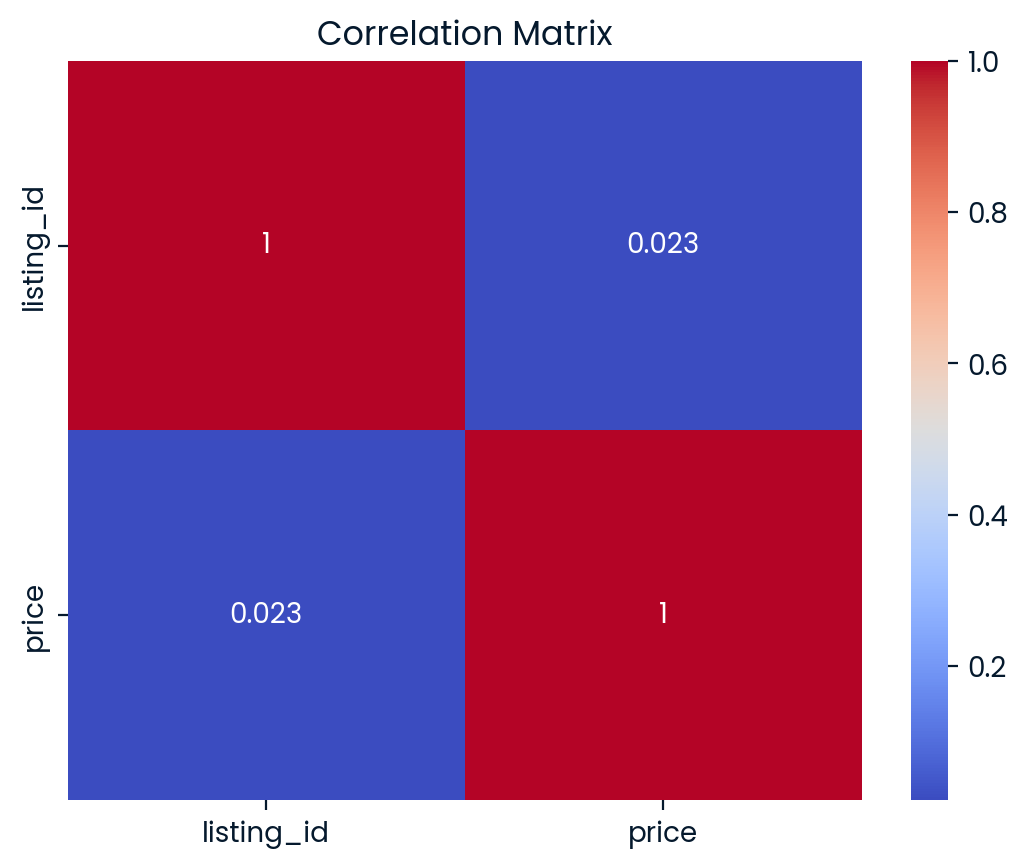

In [64]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# REPORT

#### Price of 22,500 listing were between the range of 0 to 250 dollars and the price of 2500 listings were betweeen the range of 250 to 500 dollars
meaning that most of the Airbnb prices are mostly between 250 to 500 dollars

#### Potencial neighborhood to invest are as follow
- Brooklyn, Sea Gate             
- Manhattan, Tribeca             
- Manhattan, Flatiron District  
- Manhattan, NoHo               
- Manhattan, SoHo

#### Potencial neighborhood to avoid are as follow
- Staten Island, New Dorp Beach    
- Bronx, Mount Eden                
- Bronx, Hunts Point           
- Queens, Little Neck 
- Staten Island, Bull's Head

For the neighborhood to avoid, the highest renting for a neighborhood was 12 and below, and the mean value were less than 2.5 while neighborhood to invest has mean values of and number of listings about 608 and the highest mean value as about 805


# TOP THREE CITIES TO INVEST
- Manhattan City
- Brocklyn
- Queens City
This cities has a very high average price listing indicating a city with more wealthy individuals

Most listing with shared room type were not rented wheras entire home/apt were mostly rented.